<a href="https://colab.research.google.com/github/Artenida/computer-vision-exercises/blob/main/Exercise2_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OTSU-THRESHOLDING**

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

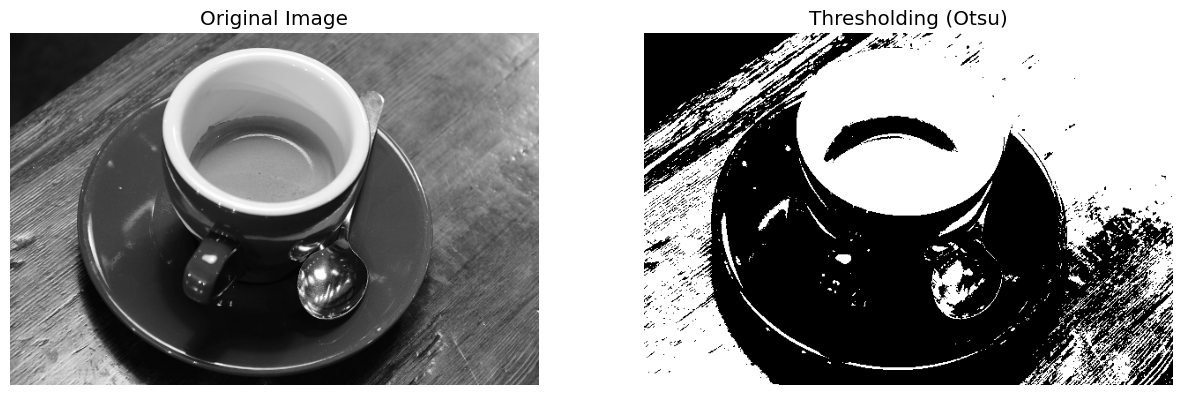

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.filters import threshold_otsu

plt.style.use('ggplot')

img = data.coffee()

# Apply thresholding, Otsu's method
#gray_image = img
gray_image = color.rgb2gray(img)  # values in [0,1]

thresh = threshold_otsu(gray_image)
binary = gray_image > thresh

# Show all results
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(binary, cmap='gray')
ax[1].set_title("Thresholding (Otsu)")
ax[1].axis('off')

\Output analysis:
Clear segmentation of high-contrast regions, the bright inner rim of the cup and the spoon's highlight are well preserved as white regions. Also the dark cup body and the background are mostly captured as black regions. So, the method has successfully isolated many structural parts of the cup and spoon from the background, showing the oultline effectively. But fine textures on the wood table and smooth shading on the cup body are lost- flattened into solid black.
Shadows and low-contrast regions become indistinct.

**K-Means Segmentation**

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

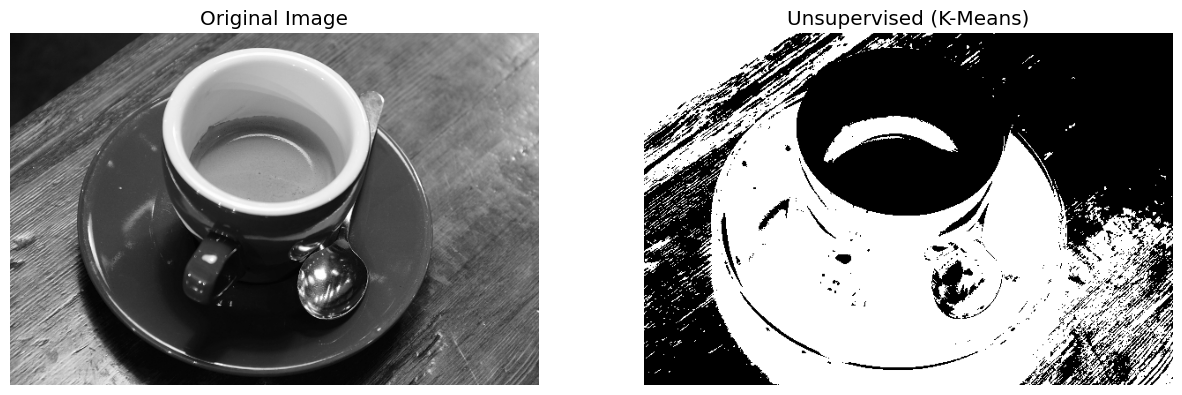

In [5]:
from skimage import color
from sklearn.cluster import KMeans

# Apply unsupervised segmentation (K-Means)
image_rgb = color.gray2rgb(gray_image)
pixels = image_rgb.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=42).fit(pixels)
kmeans_labels = kmeans.labels_.reshape(image_rgb.shape[:2])

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(kmeans_labels, cmap='gray')
ax[1].set_title("Unsupervised (K-Means)")
ax[1].axis('off')

In this binary segmentation, K=2, foreground vs background.
K-Means captures a wider range of contrast differences and clusters regions like the cup's interior, the wood background etc.
The dark interior of the cup is sharply defined, creating a clear silhoutte and separation from the cup rim. The spoon's contour is mostly preserved.
The wooden surface has been heavily fragmented into black and white patches due to hight texture and lighting variation, which is a drawback of K-Means on textured backgrounds.

**QDA**

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

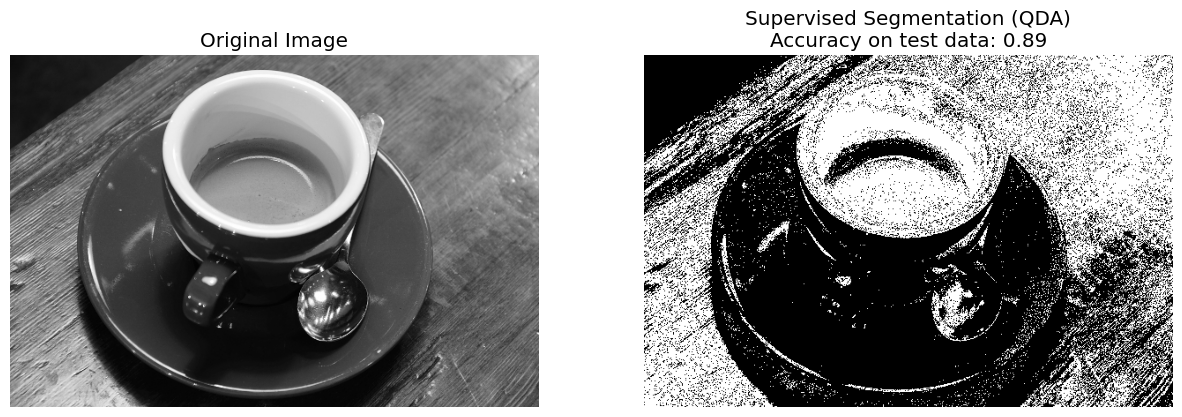

In [6]:
from skimage import filters
from skimage.util import img_as_float
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Convert grayscale image to RGB for model input
image_rgb = color.gray2rgb(gray_image)
X = image_rgb.reshape(-1, 3)
y = binary.reshape(-1).astype(int)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Train QDA classifier
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict and reshape result
qda_pred = qda.predict(X).reshape(gray_image.shape)

# Evaluate accuracy on test data
qda_test_pred = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_test_pred)

# Display segmentation result
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(qda_pred, cmap='gray')
ax[1].set_title(f"Supervised Segmentation (QDA)\nAccuracy on test data: {qda_accuracy:.2f}")
ax[1].axis('off')

The contrast between objects and background has been enhanced, highlighting edges and boundaries.QDA can capture non-linear class boundaries better than Linear Discriminant Analysis (LDA), which is beneficial in images where objects have complex shapes and textures.
The segmentation image shows a significant amount of noise, especially in textured regions like the table surface.

**LDA**

LDA Test Accuracy: 0.99


(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

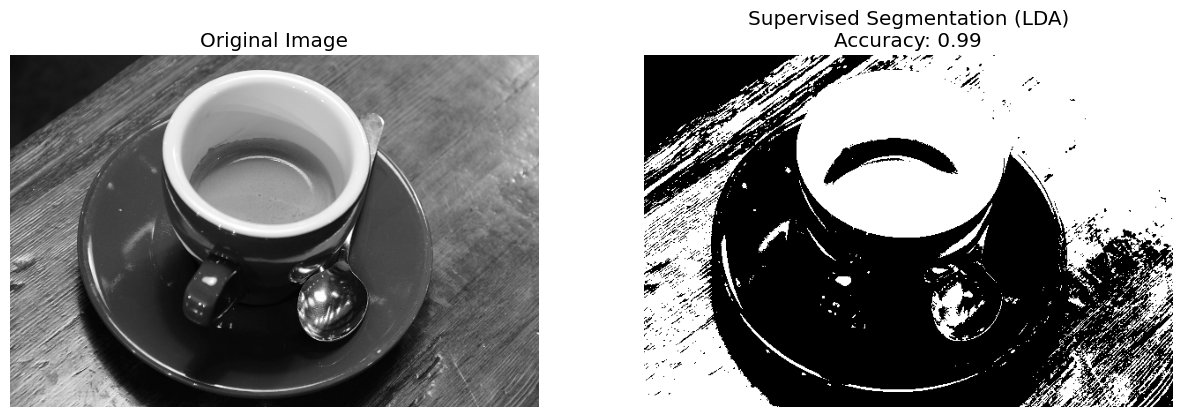

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.filters import threshold_otsu
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert grayscale to RGB
image_rgb = color.gray2rgb(gray_image)
X = image_rgb.reshape(-1, 3)               # Features: RGB
y = binary.reshape(-1).astype(int)         # Labels: 0 or 1 from Otsu

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on full image and reshape
lda_pred = lda.predict(X).reshape(gray_image.shape)

# Accuracy on test set
lda_test_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, lda_test_pred)
print(f"LDA Test Accuracy: {accuracy:.2f}")

# Show result
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(lda_pred, cmap='gray')
ax[1].set_title(f"Supervised Segmentation (LDA)\nAccuracy: {accuracy:.2f}")
ax[1].axis('off')

**Unsupervised Segmentation:**
Groups pixels into clusters based on similarity without labeled data.
Useful for exploring unknown patterns.
Examples: K-Means, GMM.
Advantages: Simple, does not require labeled data.
Disadvantages: Less accurate, and harder to evaluate.

**Supervised Segmentation:**
Requires labeled training data.
Examples: Classifiers, neural networks.
Advantages: High accuracy with quality labels.
Disadvantages: Requires labeled data (often costly/time-consuming), may not generalize well to new images.

**Examples:**
Unsupervised: Segmenting an aerial image into land, water, and buildings based only on color and texture.
Supervised: Classifying each pixel in a medical image as tumor or non-tumor based on labeled examples.